# Pyber Ride Sharing

### Analysis

* __Observed Trend 1__: The Urban area has the most rides, drivers, and fares 
* __Observed Trend 2__: The Rural area has the least total amount of rides, however, the average fare ($) is the highest among the 3 different types of city classes.
* __Observed Trend 3__: It seems that the Rural and Suburban areas may have shortage of drivers supply, but on the other hand, the Urban area is probably over saturared of drivers.

In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# File to Load
city_data = pd.read_csv("Data/city_data.csv")
ride_data = pd.read_csv("Data/ride_data.csv")

In [7]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [8]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [9]:
#Validating datas (Ride and City), setting city+date+fare+ride_id as unique ID; and Type as unique value to combine the driver_count, if any City has more than one driver count.
ride = ride_data.groupby(['city']+['date']+['fare']+['ride_id'])
a = int(len(ride)) 
b = int(len(ride_data))
if a == b:
    print ('no need to consolidate ride_data')
else:
    ride_data = ride_data.drop.duplicates()
c = city_data['city'].nunique()
d = city_data['city'].count()
if c == d:
    print ('no need to consolidate city_data')
else:
    city = city_data.groupby(['city']+['type'])
    city_data = city['driver_count'].sum()
    city_data = city_data.reset_index()
    e = city_data['city'].count()
    print('City data consolidated from '+str(d)+' to ' +str(e))

no need to consolidate ride_data
no need to consolidate city_data


In [10]:
#Merging datasets
city_ride = pd.merge(ride_data,city_data,how='left',on='city')
city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Bubble Plot of Ride Sharing Data

In [11]:
# Setting variables for the the Bubble Plot
city_ride_grouped = city_ride.groupby(['city']+['type']+['driver_count'])
Avg_Fare = city_ride_grouped['fare'].mean()
Total_Rides = city_ride_grouped['ride_id'].count()

df = pd.DataFrame({"AvgFare":Avg_Fare, "TotalRides":Total_Rides})
df = df.reset_index()

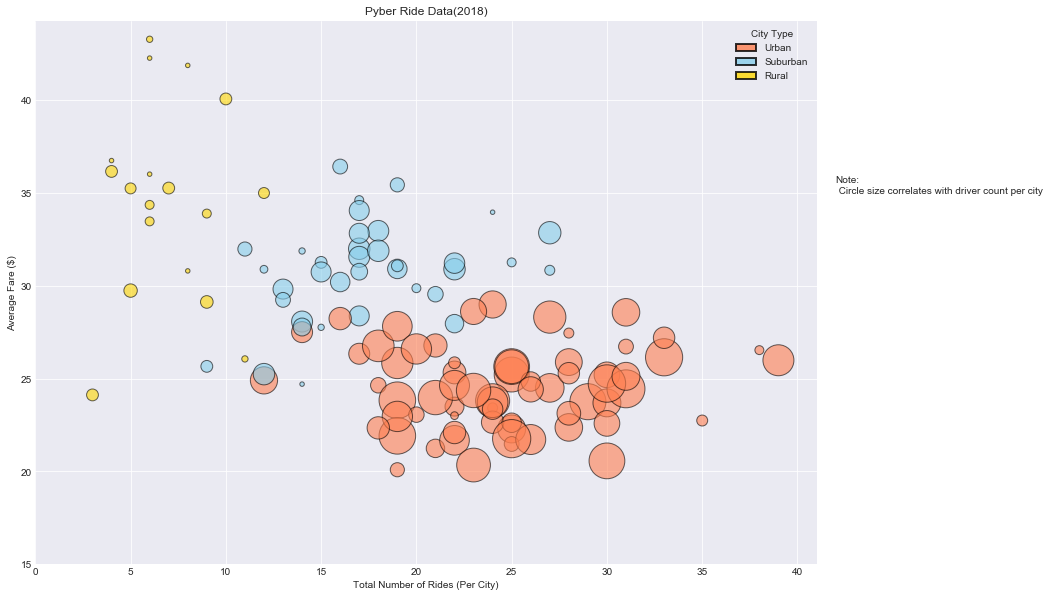

In [12]:
colors = {'Urban':'coral', 'Suburban':'skyblue', 'Rural':'gold'}
import matplotlib.patches as mpatches

U = mpatches.Circle((0.8, 0.8), 0.2, facecolor="coral",alpha=.8,edgecolor="black",linewidth=2)
S = mpatches.Circle((0.8, 0.8), 0.2, facecolor="skyblue",alpha=.8,edgecolor="black", linewidth=2)
R = mpatches.Circle((0.8, 0.8), 0.2, facecolor="gold",alpha=.8,edgecolor="black", linewidth=2)

sns.set_style("darkgrid") 
fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(df['TotalRides'], df['AvgFare'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
ax.legend([U,S,R],["Urban","Suburban","Rural"],title= 'City Type')

ax.set_xlim(0, max(df['TotalRides'])+2)
ax.set_ylim(15, max(df['AvgFare'])+1)
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Data(2018)")
ax.text(42,35,'Note:\n Circle size correlates with driver count per city')

plt.show()

### Total Fares by City Type

In [13]:
#Setting variables for the Pie Chart
GType = city_ride.groupby(['type'])
GGType = city_data.groupby(['type'])
TFare = GType['fare'].sum()
TRides = GType['ride_id'].count()
TDrivers = GGType['driver_count'].sum()
df1 = pd.DataFrame({"TotalFare":TFare, "TotalRides":TRides, "TotalDrivers":TDrivers})
df1 = df1.reset_index()
df1

,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


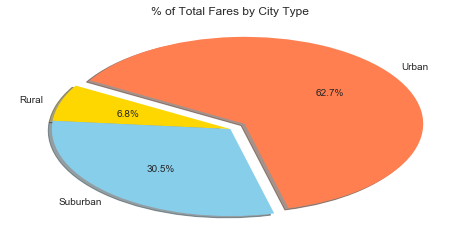

In [14]:
labels = df1['type']
sizes = df1['TotalFare']
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(8,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
plt.show()

### Total Rides by City Type

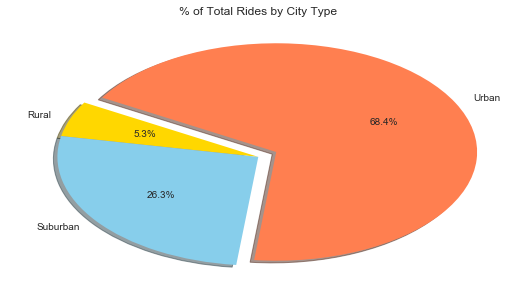

In [15]:
labels = df1['type']
sizes = df1['TotalRides']
colors = ["gold", "skyblue", "coral"]
explode = (0, 0, 0.1)
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
plt.show()

### Total Drivers by City Type

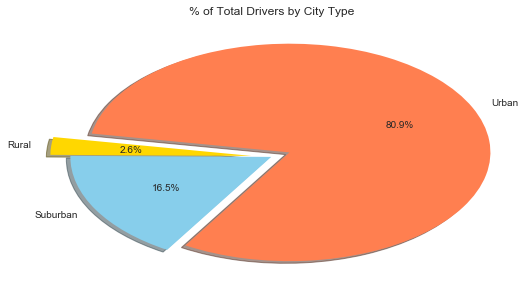

In [16]:
labels = df1['type']
sizes = df1['TotalDrivers']
colors = ["gold", "skyblue", "coral"]
explode = (0.1, 0, 0.1)
plt.figure(figsize=(9,5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.show()